<center><h1>AI in Web Development</h1></center>

---

<center><h2>Lesson 03</h2></center>


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/snsie/ai-webdev/blob/main/lessons/lesson-03/lesson-03.solutions.ipynb)

In [1]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
import cv2

# What are spatial or "local" relationships?
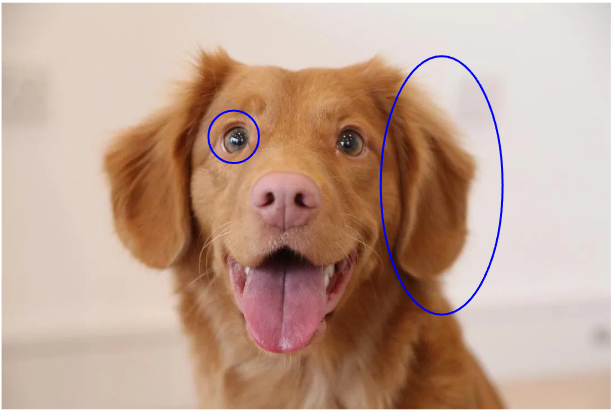
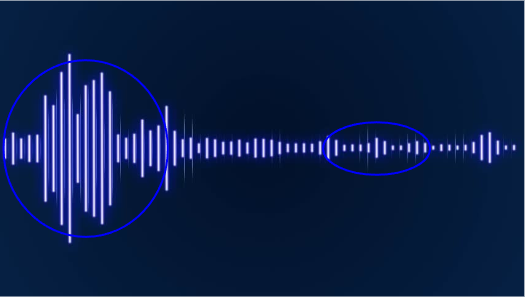
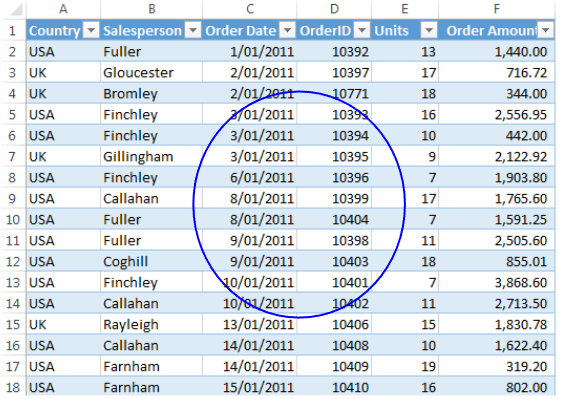

# What kinds of problems can be solved using CNNs?
**CNNS excel when used on *unstructured* data**
- Audio
- Text
- Images
- Videos
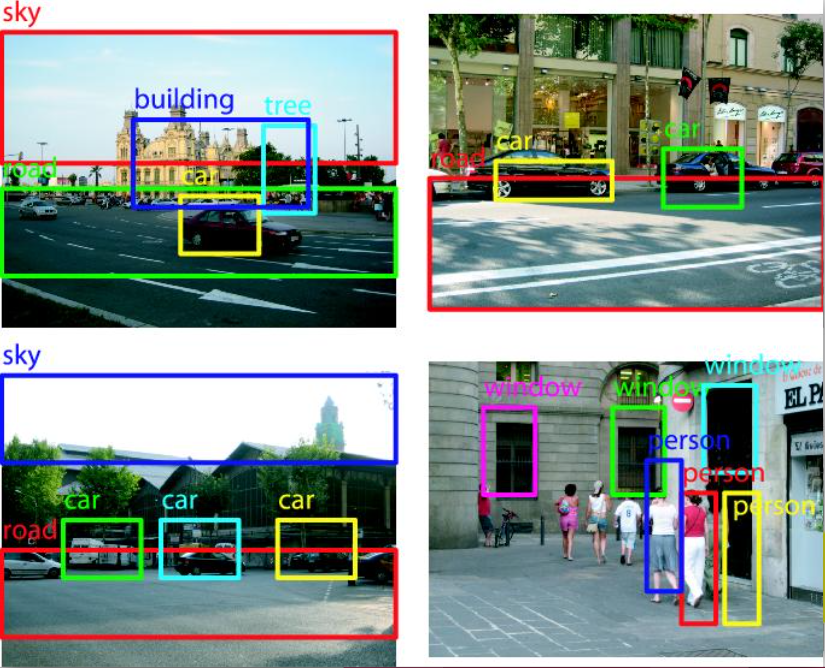

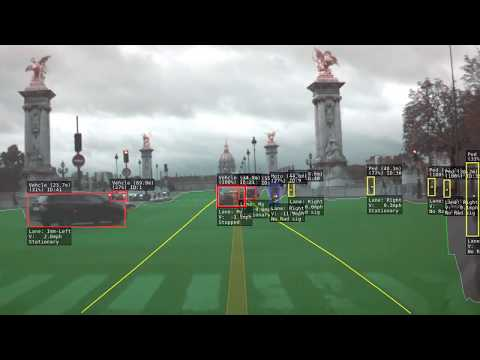

In [2]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo("_1MHGUC_BzQ")

# The Basics of Convolution
Yellow - **kernel** (called weights or filters)

Green - image

Pink - output of convolution, called an activation or **feature map**

When CNNs are trained, these kernels are updated during backpropagation to find the optimal values of each of the filters.

![image](https://media1.giphy.com/media/i4NjAwytgIRDW/giphy.gif)

# Lets see it in action
http://setosa.io/ev/image-kernels/

In [3]:
matrix = np.array([
    [0, 1, 1, 0, 1],
    [1, 0, 0, 1, 1],
    [1, 1, 0, 0, 0],
    [1, 1, 0, 1, 0],
])

kernel = np.array([
    [-1, -1, -1],
    [-1, 0, -1],
    [-1, -1, -1],
])
print(matrix)
print(kernel)

[[0 1 1 0 1]
 [1 0 0 1 1]
 [1 1 0 0 0]
 [1 1 0 1 0]]
[[-1 -1 -1]
 [-1  0 -1]
 [-1 -1 -1]]


In [4]:
# ref: https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381
def convolve2D(image, kernel, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape) / strides) + 1)
    output = np.zeros((xOutput, yOutput))
    
    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        print("Convolution:")
                        print(image[x: x + xKernShape, y: y + yKernShape])
                        print(kernel)
                        print(kernel * image[x: x + xKernShape, y: y + yKernShape])
                        print((kernel * image[x: x + xKernShape, y: y + yKernShape]).sum())
                        print("=" * 25)
                        output[x, y] = (kernel * image[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

In [5]:
print(convolve2D(matrix, kernel))

Convolution:
[[0 1 1]
 [1 0 0]
 [1 1 0]]
[[-1 -1 -1]
 [-1  0 -1]
 [-1 -1 -1]]
[[ 0 -1 -1]
 [-1  0  0]
 [-1 -1  0]]
-5
Convolution:
[[1 0 0]
 [1 1 0]
 [1 1 0]]
[[-1 -1 -1]
 [-1  0 -1]
 [-1 -1 -1]]
[[-1  0  0]
 [-1  0  0]
 [-1 -1  0]]
-4
Convolution:
[[1 1 0]
 [0 0 1]
 [1 0 0]]
[[-1 -1 -1]
 [-1  0 -1]
 [-1 -1 -1]]
[[-1 -1  0]
 [ 0  0 -1]
 [-1  0  0]]
-4
Convolution:
[[0 0 1]
 [1 0 0]
 [1 0 1]]
[[-1 -1 -1]
 [-1  0 -1]
 [-1 -1 -1]]
[[ 0  0 -1]
 [-1  0  0]
 [-1  0 -1]]
-4
Convolution:
[[1 0 1]
 [0 1 1]
 [0 0 0]]
[[-1 -1 -1]
 [-1  0 -1]
 [-1 -1 -1]]
[[-1  0 -1]
 [ 0  0 -1]
 [ 0  0  0]]
-3
Convolution:
[[0 1 1]
 [0 0 0]
 [0 1 0]]
[[-1 -1 -1]
 [-1  0 -1]
 [-1 -1 -1]]
[[ 0 -1 -1]
 [ 0  0  0]
 [ 0 -1  0]]
-3
[[-5. -4. -3.]
 [-4. -4. -3.]]


In [6]:
print(convolve2D(matrix, kernel, strides=3))

Convolution:
[[0 1 1]
 [1 0 0]
 [1 1 0]]
[[-1 -1 -1]
 [-1  0 -1]
 [-1 -1 -1]]
[[ 0 -1 -1]
 [-1  0  0]
 [-1 -1  0]]
-5
[[-5.]]


# What is an image?
An image is technically 3D: (width, height, number of channels).
A typical image is RGB format, 3 channels representing red, green, and blue values of each pixel.
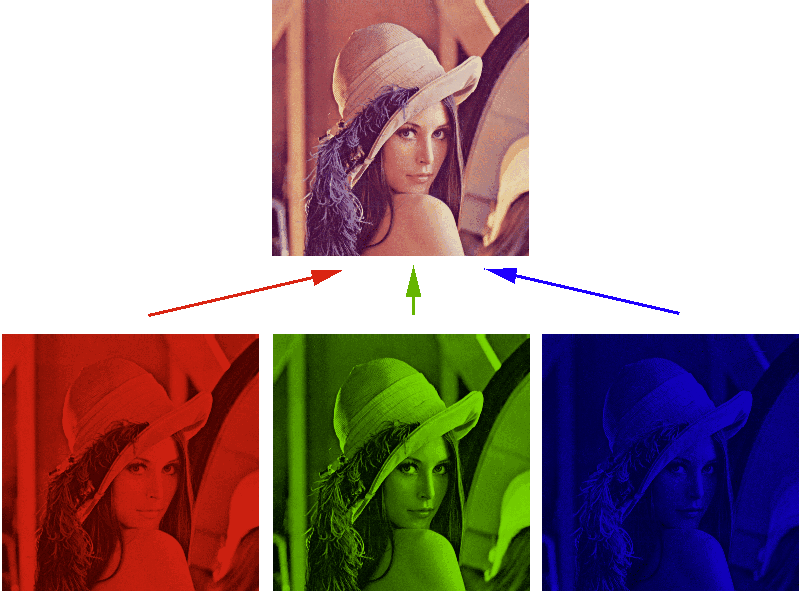

In [7]:
image_file = "https://i.kym-cdn.com/entries/icons/mobile/000/013/564/doge.jpg"
image = skimage.io.imread(image_file)

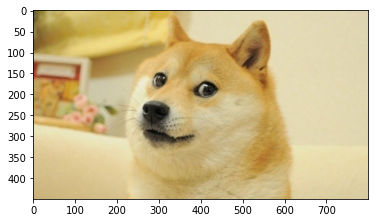

In [8]:
plt.imshow(image)

In [9]:
print(image.shape)

(450, 800, 3)


In [10]:
print(image[:, :, 0])
print("-"*25)
print(image[:, :, 1])
print("-"*25)
print(image[:, :, 2])

[[ 66  77  88 ... 217 217 216]
 [ 72  81  90 ... 217 217 216]
 [ 73  80  87 ... 218 217 216]
 ...
 [203 203 203 ... 217 216 215]
 [201 200 198 ... 217 216 215]
 [202 201 200 ... 217 216 215]]
-------------------------
[[ 71  79  89 ... 211 211 212]
 [ 77  83  91 ... 211 211 212]
 [ 78  82  88 ... 212 211 212]
 ...
 [178 178 178 ... 204 203 202]
 [176 175 173 ... 204 203 202]
 [177 176 175 ... 204 203 202]]
-------------------------
[[ 31  39  47 ... 175 175 175]
 [ 37  43  49 ... 175 175 175]
 [ 38  43  48 ... 176 175 175]
 ...
 [122 122 122 ... 160 159 158]
 [119 118 116 ... 159 158 157]
 [120 119 118 ... 159 158 157]]


# How do we convolve images?
- Most images are colored, and have 3 channels (red, green, and blue)
- Initial filters then, must also be 3 channels deep
- One convolution is now the dot product of 27 values (3 x 3 x 3)
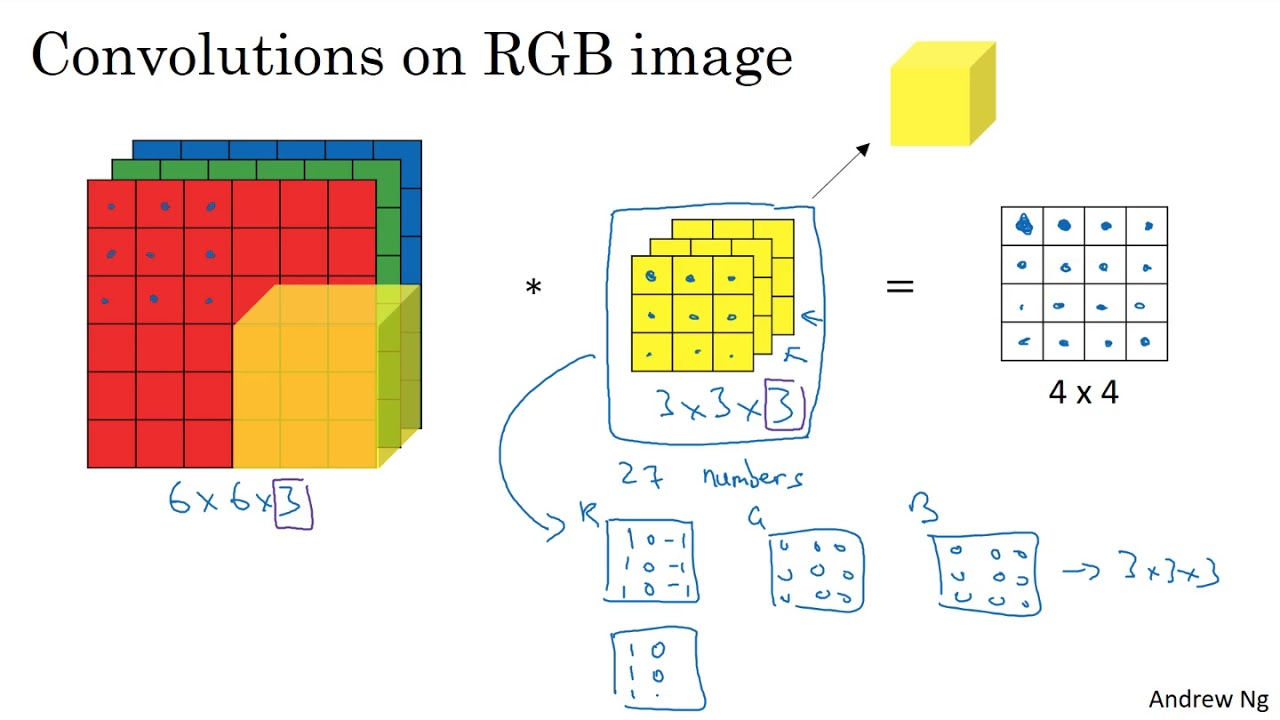

# Extracting Many Features
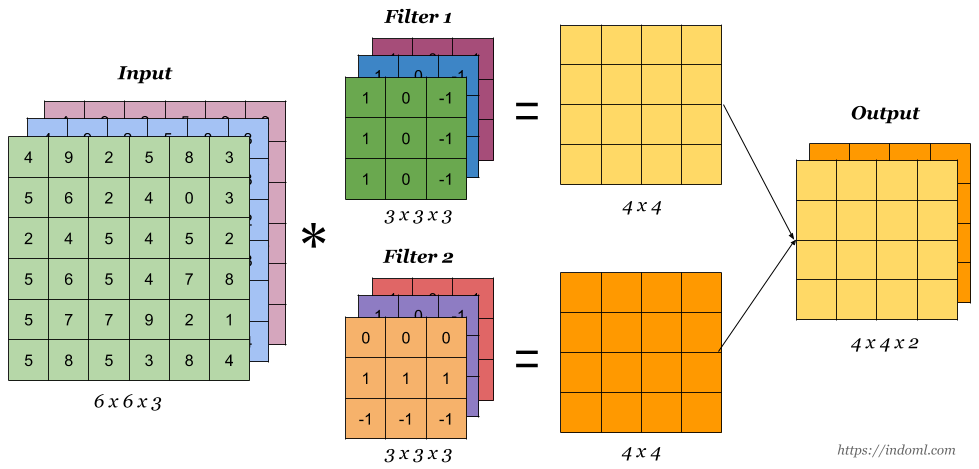

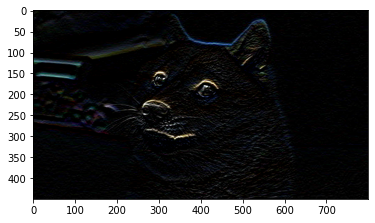

In [11]:
# top sobel will extract top edges
top_sobel = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
])

convolved_image = cv2.filter2D(image, -1, top_sobel)

plt.imshow(convolved_image)

# What do the filters learn?
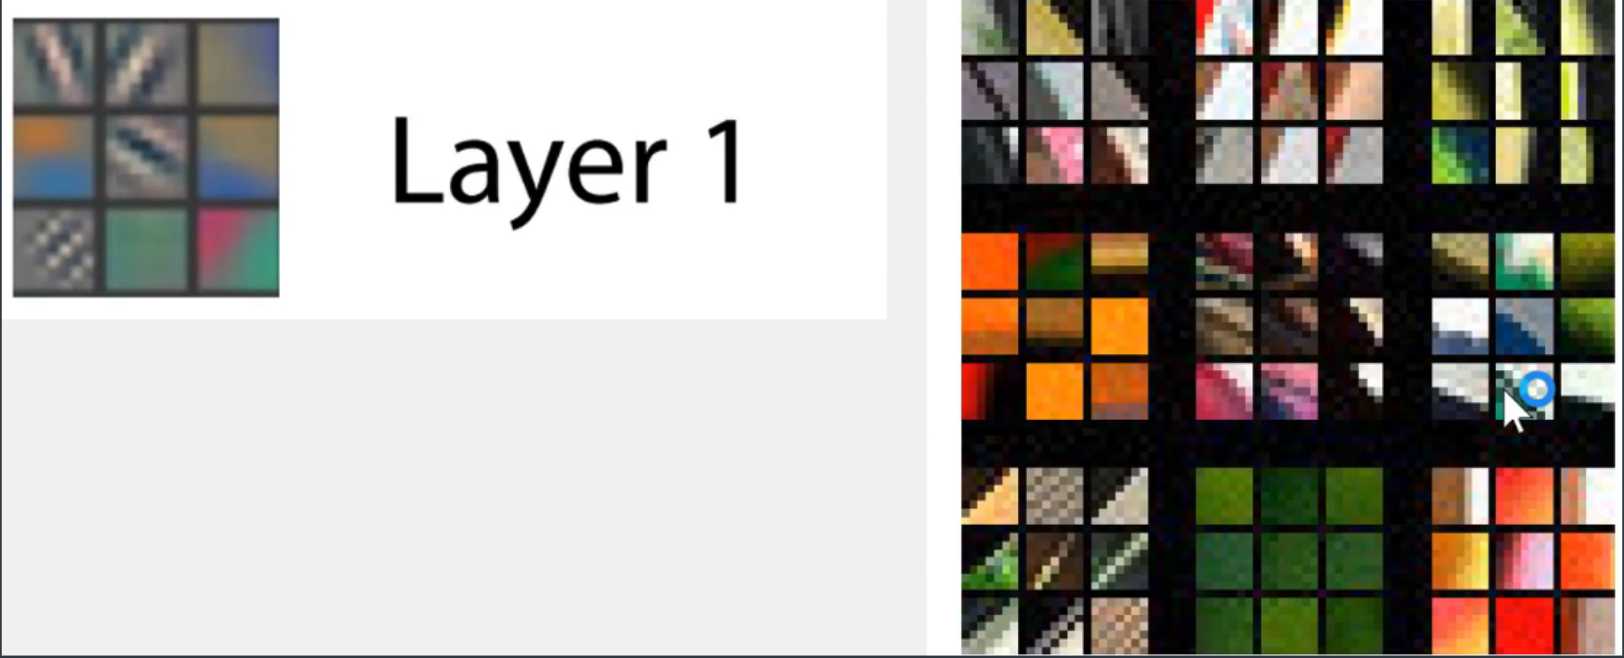

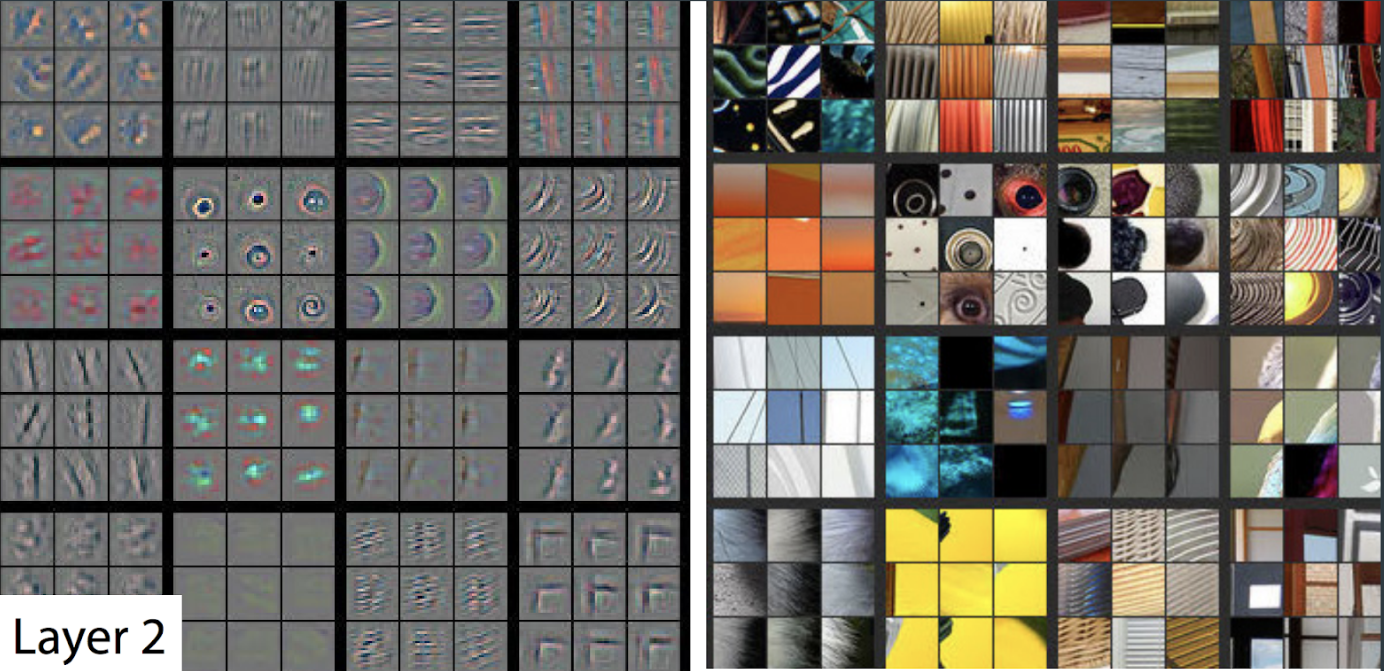

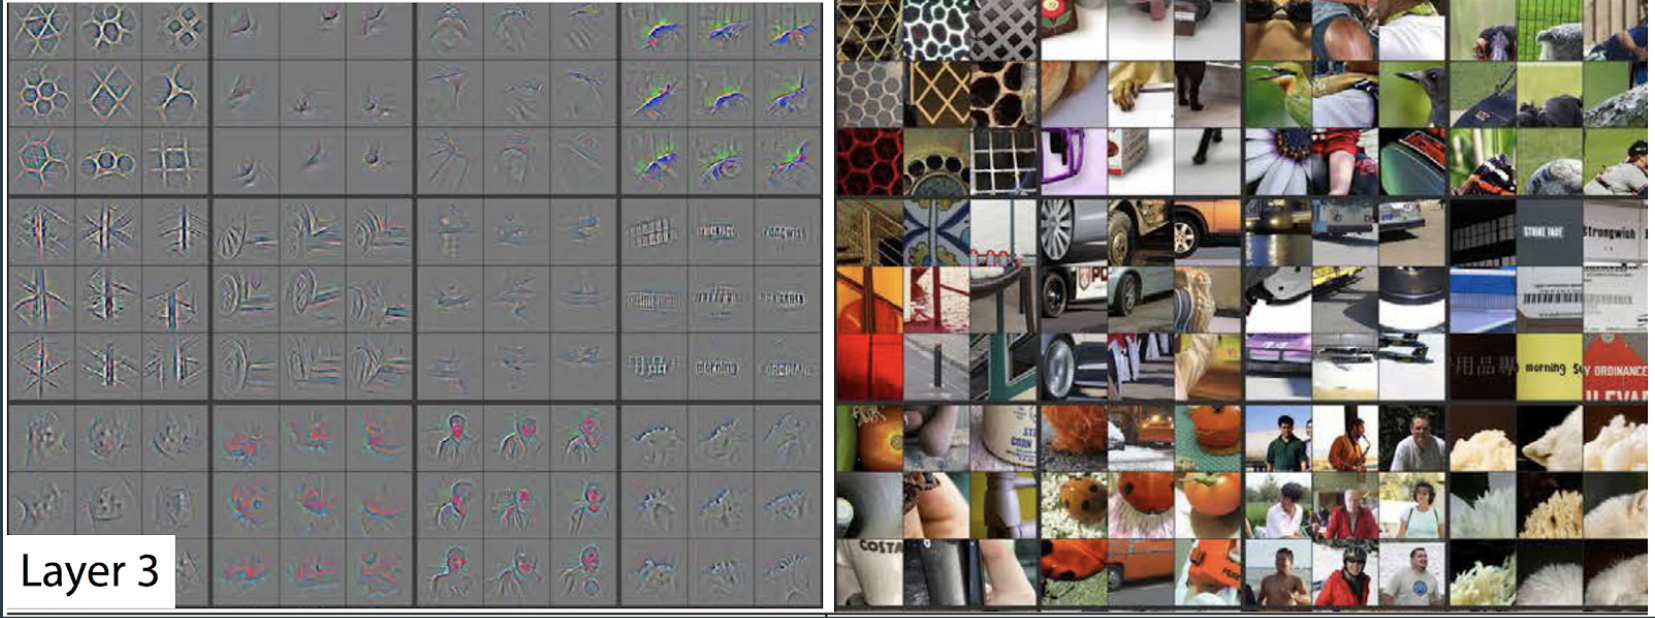

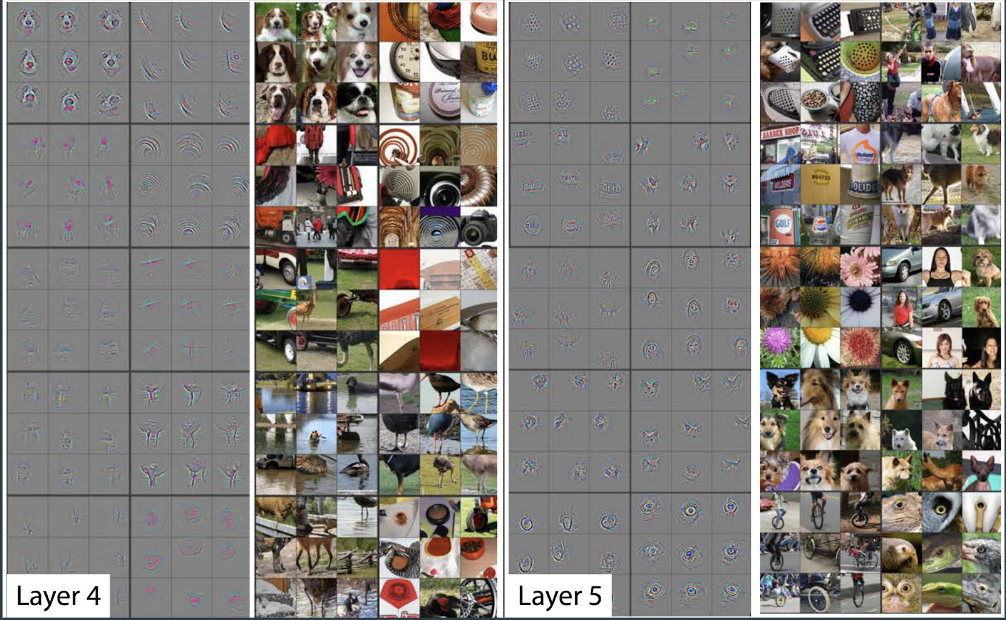

# Properties of Kernels
**Stride** number of pixels the filter skips after each convolution. We have shown a stride of one so far.

Stride of 1:
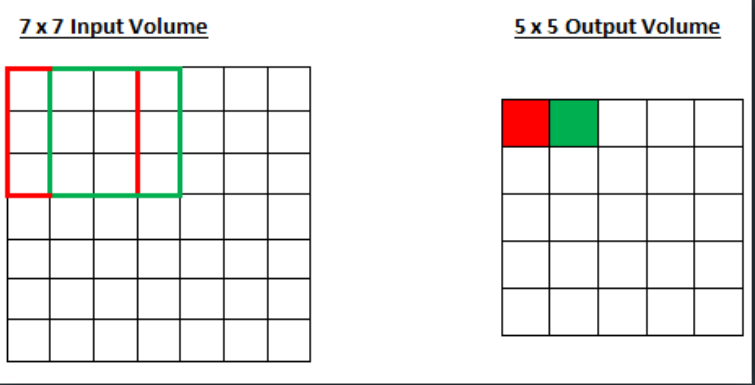

Stride of 2:
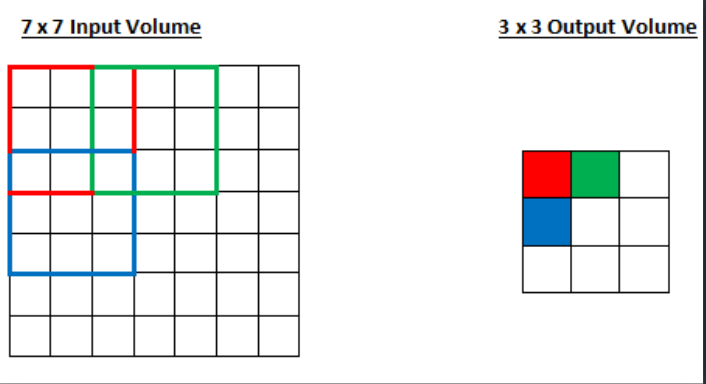

**Padding**: adding pixels to the edges of the image, so the filter fits properly when being convolved across.
- Zero padding: pad edges with zeros
- Valid padding: no padding, drop edges of images that doesn't fit
- Reflective padding: pad edges with reflections of them
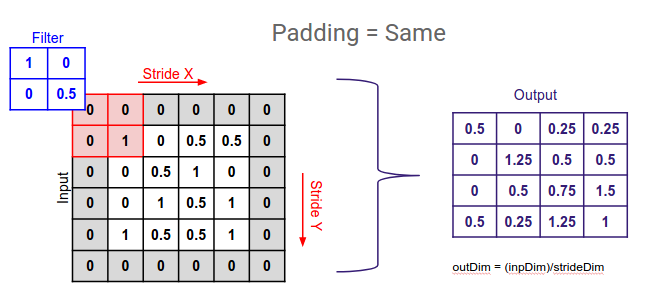

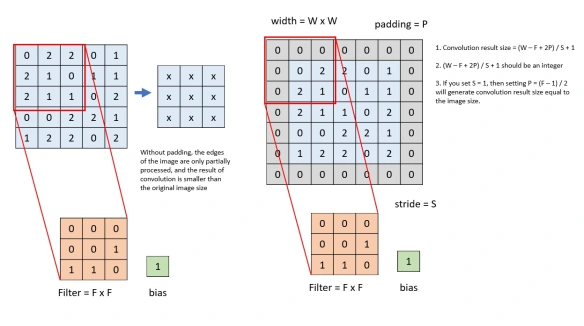

# Activation functions for Convolutional Layers
In practice, it seems the ReLU function performs the best for image tasks. There is much research on why this is the case, but for now keep it in mind when working with CNNs.

Intuitively, negative features are ones that the network should ignore, vs positive features are ones that the model should focus on. 

# The Magic of Pooling
Downsampling the input to reduce the size and enable the model to generalize feature extraction across varying orientations and scale of the image.

Intuitively: picking the **best** feature from each *window* when pooling.

- Max pooling
- Average pooling
- Global pooling

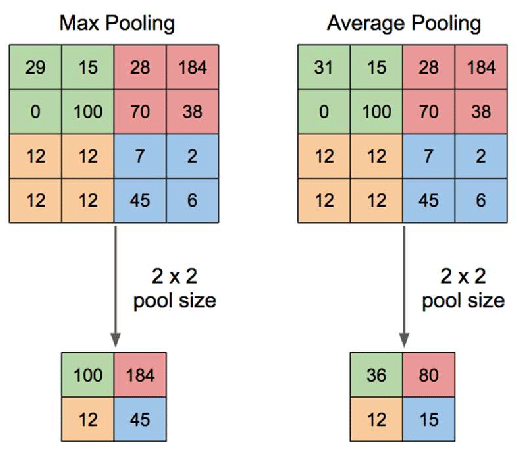

In [12]:
matrix = np.array([
    [  20,  200,   -5,   23],
    [ -13,  134,  119,  100],
    [ 120,   32,   49,   25],
    [-120,   12,   9,   23],
])

l, w = matrix.shape
pool_size = 2
stride = 2

window_l = l // pool_size
window_w = w // stride

print(matrix[:window_l * pool_size, :window_w * stride].reshape(window_l, pool_size, window_w, stride).max(axis=(1, 3)))

[[200 119]
 [120  49]]


# Preventing overfitting and reducing training time
Dropout: we have seen it before

Batch Normalization: normalizing activations (kernels) after a CNN layer.
- Meaning the output has a mean of 0 and standard deviation of 1

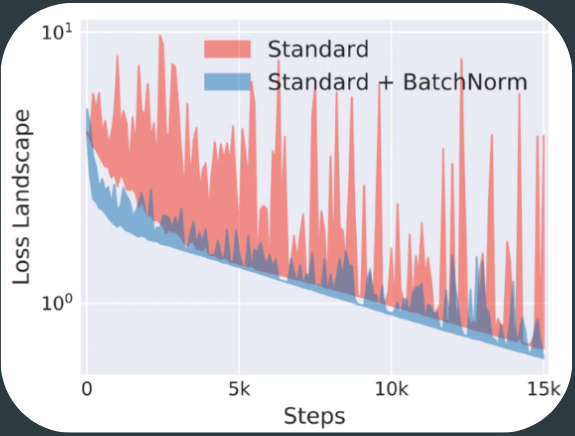

# How do we classify the feature maps?
1. Turn 3D output in 1D array
2. Input into fully connected layers we have use before
3. Use output layer and labels to train

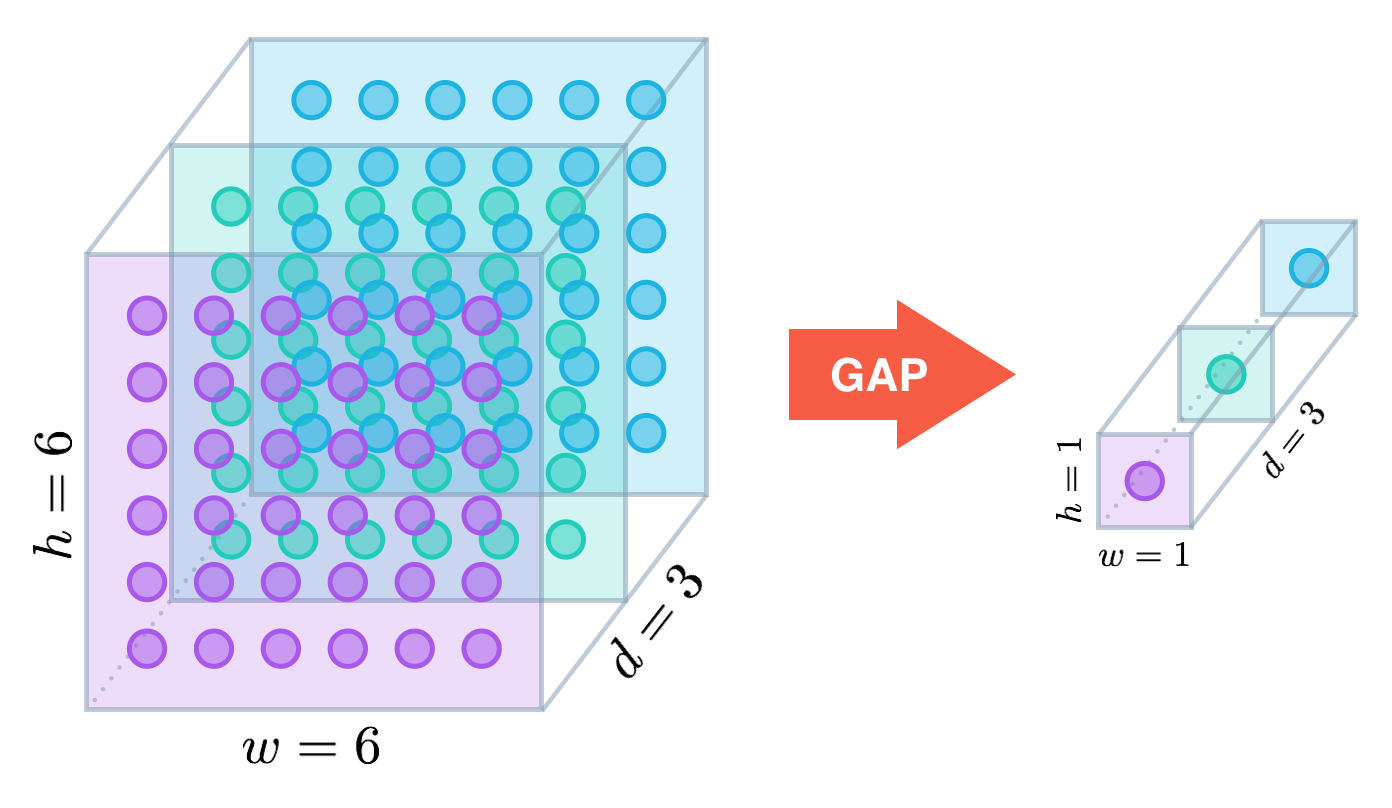

In [13]:
print(matrix)

[[  20  200   -5   23]
 [ -13  134  119  100]
 [ 120   32   49   25]
 [-120   12    9   23]]


In [14]:
gap = np.apply_over_axes(np.mean, matrix, [0, 1])

print(gap)

[[45.5]]


# Output activation functions
- **Softmax**: Creates a distribution where each value is positive and all values sum to 1
    - Best for **single-label**, multi-class classification
- **Sigmoid**: Values will be between 0 and 1, will not add to 1
    - Best for **multi-label**, multi-class classification

In [15]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

logits = np.array([8.3, 2.1, 3.2, 5.6])

print(softmax(logits))
print(softmax(logits).sum())
print(sigmoid(logits))
print(sigmoid(logits).sum())

[0.92994562 0.00188726 0.00566964 0.06249747]
1.0
[0.99975154 0.89090318 0.96083428 0.99631576]
3.8478047610263477


# Recap of CNNs
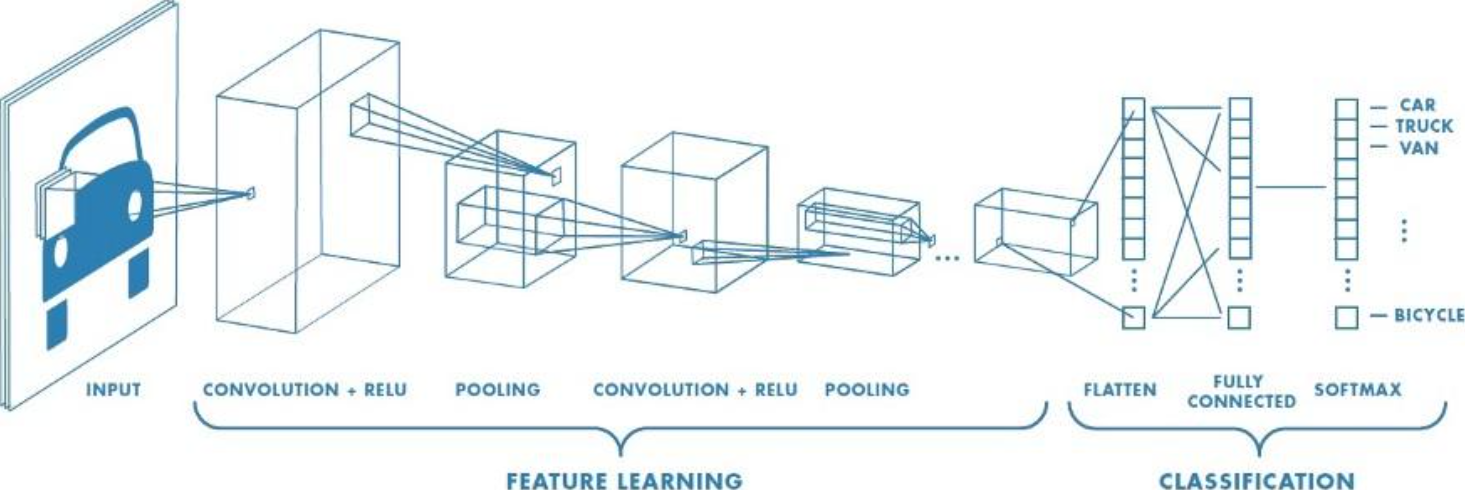